<a href="https://colab.research.google.com/github/UniqueCODER/AlgorithmsPython/blob/master/Botnoi_ChatAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import LIBRARIES 

In [1]:
!pip install tldextract

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tldextract

In [3]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

# **ACCESS DATA**



*   Open excel file from drive 
*   Set default columns




In [4]:
worksheet = gc.open('botnoi_survey1').sheet1

rows = worksheet.get_all_values()
df = pd.DataFrame.from_records(rows)

# **DATA INFORMATION**


1.   Top and Bottom values 
2.   Info 
3.   Shape



In [5]:
df.columns = df.iloc[0]
df = df[1:]

In [6]:
df.head()

,SNO,P1,P2,P3,P4,P5.1,P5.2,P5.3,P5.4,P5.5,P5.6,P5.7,P5.8,P5.9,P6.1,P6.2,P6.3,P6.4,P6.5,P6.6,P6.7,P6.8,P6.9,P7.1,START_AT,END_AT
1,1,Is an elementary school,Contact Boratoon,translate language,Knowledge game,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,,,,,,,,,,,,,,,
2,2,Is a junior high school student,Change bots,Knowledge game,Knowledge game,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,"Request ... (Captions, images, quotes, numbers...",,,,,,,,,,,,,ไม่มี,2022-01-28 19:04,2022-01-28 19:05
3,3,Is a junior high school student,Private bots,"Request ... (Captions, images, quotes, numbers...",Change the text into sound,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,,,,,,,,,,,,,ตอบแชทไวๆหน่อยจ้าาาา,2022-01-28 19:04,2022-01-28 19:05
4,4,Is a junior high school student,Depress,Private bots,Contact Boratoon,Change the text into sound,#VALUE!,#VALUE!,#VALUE!,#VALUE!,"Request ... (Captions, images, quotes, numbers...",,,,,,,,,,,,,คุยกับคนรู้เรื่องเข้าใจคน,2022-01-28 19:04,2022-01-28 19:06
5,5,Is a junior high school student,Change bots,Change the text into sound,Depress,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,,,,,,,,,,,,,ตอบเหมือนเพื่อนคุยกัน ไม่กวน,2022-01-28 19:04,2022-01-28 19:06


In [7]:
df.tail()

,SNO,P1,P2,P3,P4,P5.1,P5.2,P5.3,P5.4,P5.5,P5.6,P5.7,P5.8,P5.9,P6.1,P6.2,P6.3,P6.4,P6.5,P6.6,P6.7,P6.8,P6.9,P7.1,START_AT,END_AT
32029,32029,Is a junior high school student,Private bots,Knowledge game,Change the text into sound,#VALUE!,#VALUE!,#VALUE!,Depress,#VALUE!,#VALUE!,,,,,,,,,,,,,อยากมห้บอทตอบแชทไว,2022-01-31 23:23,2022-01-31 23:25
32030,32030,Is a high school student,Private bots,Depress,Change the text into sound,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,"Request ... (Captions, images, quotes, numbers...",,,,,,,,,,,,,ไม่มีแล้วคั้บน้องบอทน่ารักมาก,2022-01-31 23:31,2022-01-31 23:32
32031,32031,Is a junior high school student,Change the text into sound,Change the text into sound,Change bots,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,,,,,,,,,,,,,พัฒนาตรงที่บอทน้อยอ่านแล้วตอบบ้างไม่ตอบบ้าง,2022-01-31 23:43,2022-01-31 23:44
32032,32032,Is a high school student,Contact Boratoon,Private bots,"Request ... (Captions, images, quotes, numbers...",#VALUE!,#VALUE!,#VALUE!,Depress,#VALUE!,#VALUE!,,,,,,,,,,,,,ตอบเร็วอย่าเมินเเชทอย่าอ่านไม่ตอบ,2022-01-31 23:43,2022-01-31 23:45
32033,32033,Is a university student,Depress,Depress,Private bots,Change the text into sound,#VALUE!,Change bots,#VALUE!,Contact Boratoon,"Request ... (Captions, images, quotes, numbers...",,,,,,,,,,,,,บางทีบอทน้อยก็เเอบอ่านเเต่ไม่ตอบเเชทเหมือนกันน...,2022-01-31 23:48,2022-01-31 23:51


In [8]:
df.describe()

,SNO,P1,P2,P3,P4,P5.1,P5.2,P5.3,P5.4,P5.5,P5.6,P5.7,P5.8,P5.9,P6.1,P6.2,P6.3,P6.4,P6.5,P6.6,P6.7,P6.8,P6.9,P7.1,START_AT,END_AT
count,32033,32033,32033,32033,32033,32033,32033,32033,32033,32033,32033,32033,32033,32033,32033,32033,32033,32033,32033,32033,32033,32033,32033,32033,32033,32033
unique,32033,5,9,9,9,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,23696,2864,2890
top,1,Is a junior high school student,Private bots,Private bots,Change the text into sound,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,,,,,,,,,,,,,ไม่มี,2022-01-28 19:05,2022-01-28 19:08
freq,1,13313,12529,6927,5405,22465,27767,25772,20148,22465,22886,32033,32033,32033,32033,32033,32033,32033,32033,32033,32033,32033,32033,2028,1497,1346


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32033 entries, 1 to 32033
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SNO       32033 non-null  object
 1   P1        32033 non-null  object
 2   P2        32033 non-null  object
 3   P3        32033 non-null  object
 4   P4        32033 non-null  object
 5   P5.1      32033 non-null  object
 6   P5.2      32033 non-null  object
 7   P5.3      32033 non-null  object
 8   P5.4      32033 non-null  object
 9   P5.5      32033 non-null  object
 10  P5.6      32033 non-null  object
 11  P5.7      32033 non-null  object
 12  P5.8      32033 non-null  object
 13  P5.9      32033 non-null  object
 14  P6.1      32033 non-null  object
 15  P6.2      32033 non-null  object
 16  P6.3      32033 non-null  object
 17  P6.4      32033 non-null  object
 18  P6.5      32033 non-null  object
 19  P6.6      32033 non-null  object
 20  P6.7      32033 non-null  object
 21  P6.8      32

In [25]:
df.shape

(32033, 26)

# **DATA CLEANING**


*   Extract Words to display count
*   Remove #VALUE!





In [9]:
import re as re
def search_words(text):
    result = re.findall(r'\b[high school|junior|elementary|university|Work|student]+\b', text)
    return " ".join(result)

In [10]:
df['P1']=df['P1'].apply(lambda x : search_words(x))
print(df)

0        SNO                             P1  ...          START_AT            END_AT
1          1           an elementary school  ...                                    
2          2   a junior high school student  ...  2022-01-28 19:04  2022-01-28 19:05
3          3   a junior high school student  ...  2022-01-28 19:04  2022-01-28 19:05
4          4   a junior high school student  ...  2022-01-28 19:04  2022-01-28 19:06
5          5   a junior high school student  ...  2022-01-28 19:04  2022-01-28 19:06
...      ...                            ...  ...               ...               ...
32029  32029   a junior high school student  ...  2022-01-31 23:23  2022-01-31 23:25
32030  32030          a high school student  ...  2022-01-31 23:31  2022-01-31 23:32
32031  32031   a junior high school student  ...  2022-01-31 23:43  2022-01-31 23:44
32032  32032          a high school student  ...  2022-01-31 23:43  2022-01-31 23:45
32033  32033           a university student  ...  2022-01-31 23:4

# **BASIC ANALYTICS**




*   BAR GRAPH FOR EACH COLUMN
*   COUNT VALUES









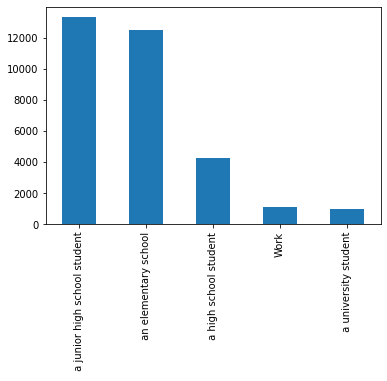

In [11]:
demographics = df['P1'].value_counts()
demographics.plot.bar()

In [12]:
df['P1'].value_counts()

 a junior high school student    13313
 an elementary school            12458
 a high school student            4228
Work                              1079
 a university student              955
Name: P1, dtype: int64

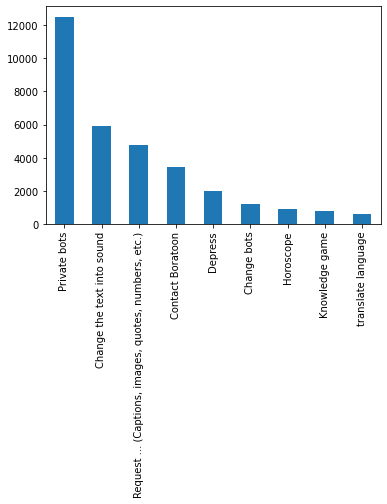

In [13]:
most_choice = df['P2'].value_counts()
most_choice.plot.bar()

In [14]:
df['P2'].value_counts()

Private bots                                             12529
Change the text into sound                                5888
Request ... (Captions, images, quotes, numbers, etc.)     4747
Contact Boratoon                                          3424
Depress                                                   1989
Change bots                                               1206
Horoscope                                                  874
Knowledge game                                             779
translate language                                         597
Name: P2, dtype: int64

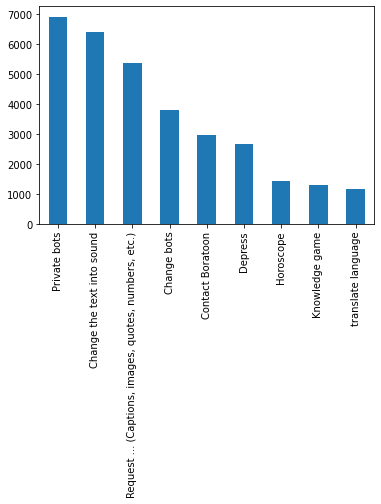

In [15]:
second_choice = df['P3'].value_counts()
second_choice.plot.bar()

In [16]:
df['P3'].value_counts()

Private bots                                             6927
Change the text into sound                               6404
Request ... (Captions, images, quotes, numbers, etc.)    5362
Change bots                                              3806
Contact Boratoon                                         2969
Depress                                                  2659
Horoscope                                                1438
Knowledge game                                           1302
translate language                                       1166
Name: P3, dtype: int64

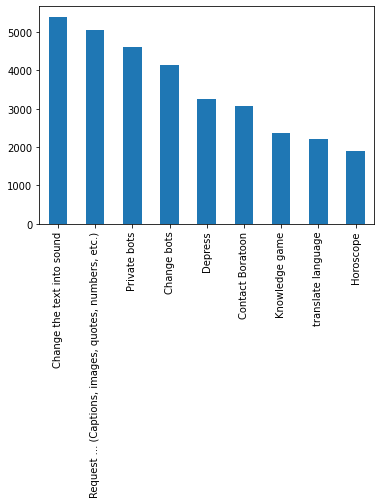

In [17]:
third_choice = df['P4'].value_counts()
third_choice.plot.bar()

In [18]:
df['P4'].value_counts()

Change the text into sound                               5405
Request ... (Captions, images, quotes, numbers, etc.)    5051
Private bots                                             4606
Change bots                                              4154
Depress                                                  3265
Contact Boratoon                                         3077
Knowledge game                                           2354
translate language                                       2215
Horoscope                                                1906
Name: P4, dtype: int64

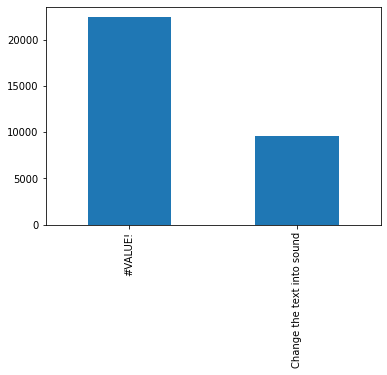

In [19]:
least_choice = df['P5.1'].value_counts()
least_choice.plot.bar()

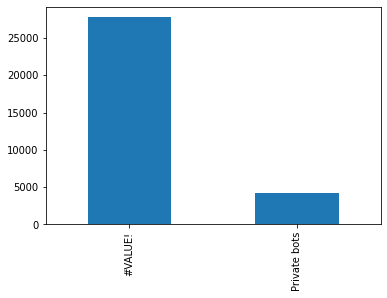

In [20]:
least_choice = df['P5.2'].value_counts()
least_choice.plot.bar()

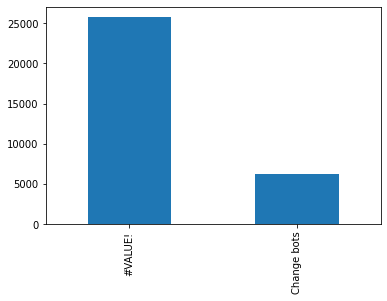

In [21]:
least_choice = df['P5.3'].value_counts()
least_choice.plot.bar()

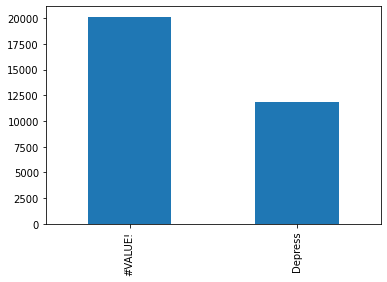

In [22]:
least_choice = df['P5.4'].value_counts()
least_choice.plot.bar()